In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from EulerFuncional import *

In [2]:
def f(t,y):
    return (2*t)/(1+(t**2))

def yReal(t):
    return np.log(1+(t**2))

In [3]:
y0 = 0.0
h = 0.25
I = [0,1]    
#Euler(f,yReal,h,I,0)

In [4]:
def AdamBashford2(faprox,freal,h,I,y0,grafico):
    '''
    Método Adam - Bashford 2 para Problemas de Valor Inicial
    El método utiliza dos puntos anteriores para calcular el siguiente
    Utilizo el método de Euler Explícito para calcular el primer punto
    Luego aplico Adam-Bashford
    '''
    
    # Creo un DataFrame para hacer la tabla y poder graficar luego
    # Nombro las columnas y creo la primera fila que es el valor inicial
    columnas=["t","yAprox","yReal","eLocal","eGlobal"]
    df = pd.DataFrame(np.array([[I[0],y0,y0,0.0,0.0]]),columns=columnas)    
    
    # Calculo el punto anterior    
    df = df.append(Euler(faprox,freal,h,[I[0],I[0]+h],y0,False).loc[1])
    
    # Determino los pasos a utilizar en funcion del intervalo I y el tamaño de paso h
    # pasos = [I[0]+(i*h) for i in range(1,int((I[1]-I[0])//h)+1)]
    pasos = [i for i in np.arange(I[0]+h,I[1]+h,h)] 
    
    # Usando la fila anterior (resultados del paso anterior) calculo el siguiente
    for i in range(1,len(pasos)):        
        t = pasos[i-1]
        t0 = t-h        
        y = float(df["yAprox"].loc[i])
        y0 = float(df["yAprox"].loc[i-1])
        yaprox = y + ((h/2) * ((3*faprox(t,y))-faprox(t0,y0)))
        yreal = freal(pasos[i])
        df = df.append(pd.DataFrame(np.array([[pasos[i],yaprox,yreal,abs(yaprox-y),abs(yaprox-yreal)]]),columns=columnas),ignore_index=True)
    
    # Hago un print de la tabla
    if grafico:
        print(df)
    
    # Grafico las funciones y los errores
    if grafico:
        graficar(df)   

      t    yAprox     yReal    eLocal   eGlobal
0   0.0  0.000000  0.000000  0.000000  0.000000
1   0.1  0.000000  0.009950  0.000000  0.009950
2   0.2  0.029703  0.039221  0.029703  0.009518
3   0.3  0.077494  0.086178  0.047791  0.008683
4   0.4  0.140832  0.148420  0.063338  0.007588
5   0.5  0.216758  0.223144  0.075925  0.006386
6   0.6  0.302275  0.307485  0.085517  0.005210
7   0.7  0.394628  0.398776  0.092353  0.004148
8   0.8  0.491450  0.494696  0.096822  0.003246
9   0.9  0.590811  0.593327  0.099362  0.002515
10  1.0  0.691202  0.693147  0.100391  0.001945


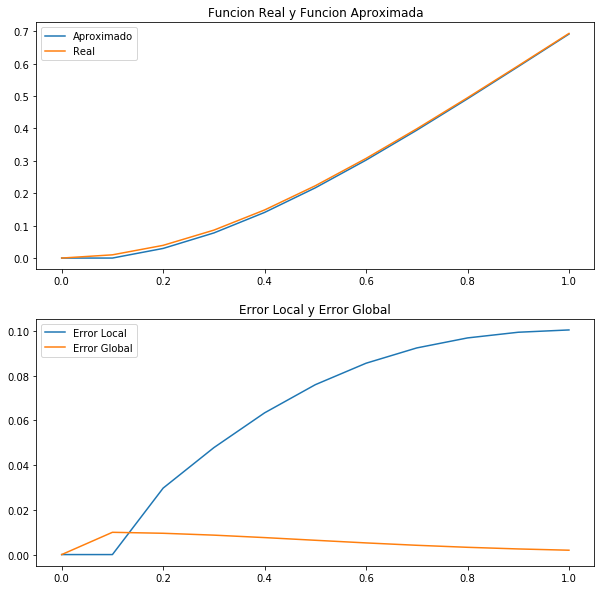

In [5]:
I = [0,1]
y0 = 0
h = 0.1

AdamBashford2(f,yReal,h,I,y0,True)